In [1]:
from util import *
from expval_calc_q_optim import *
from generate_training_set import *

from qiskit.utils import QuantumInstance 
from qiskit.test.mock import FakeVigo
from qiskit import Aer

import matplotlib.pyplot as plt

In [2]:
# Create appropriate instances
vigo_backend = FakeVigo()
em_instance = QuantumInstance(backend = vigo_backend, shots = 10000)
sv_backend = Aer.get_backend('aer_simulator_statevector')
ef_instance = QuantumInstance(backend = sv_backend)

In [ ]:
# LBEM
seed = 100

group_pauli_op, [ansatz,num_par_gates] = main('H2', 0.774, 2, 1, 'num_particle_preserving')
group_pauli_op = group_pauli_op['grouped_paulis']
print('Ansatz & qubit hamiltonian created')

trunc_T, trunc_P = truncate_training_set(num_par_gates, 0, 0, s = seed, exhaustive= True)
circuit_list = get_circuits_dict(ansatz, trunc_T, trunc_P, num_par_gates)
print('Training circuits generated')

com_ef, com_em = expval_calc(group_pauli_op, circuit_list, em_instance, ef_instance)
print('All expectation values calculated')

q = q_optimize(group_pauli_op, circuit_list, com_em, com_ef)
print('q optimized')

In [4]:
q = (np.array([ 0.14194186,  0.06747891,  0.13828064, -0.06541691, -0.22458071,
         0.08115016,  0.16268455,  0.12371261, -0.11375525,  0.24046799,
         0.17608165,  0.29945689,  0.33289895, -0.09781343, -0.15121869,
         0.13645273, -0.01360663]), ['II','IX','IY','IZ','XI','XX','XY','XZ','YI','YX','YY','YZ','ZI','ZX','ZY','ZZ','q0'])

{'vqe_em_energy': [(-1.0762831857150699+0j), (-1.1360555522126763+0j), (-1.1521809374632284+0j), (-1.148407401253701+0j), (-1.1232189639432097+0j), (-1.1001373470515894+0j), (-1.0704877902825864+0j), (-1.0437968657989387+0j), (-1.0182370110961088+0j), (-0.995951403710889+0j)], 'noisy_vqe_energy': [(-0.9036582741034624+0j), (-0.9876319090390633+0j), (-1.0257399341208908+0j), (-1.0366163639436439+0j), (-1.0243378245286068+0j), (-1.0109033321319187+0j), (-0.9943032931832322+0j), (-0.9726373914599966+0j), (-0.9567870486839936+0j), (-0.9378332997965497+0j)], 'ef_vqe_energy': [(-1.0551597763898066+0j), (-1.1200708509215929+0j), (-1.1371661238340725+0j), (-1.1305491347926786+0j), (-1.11241899625264+0j), (-1.089115664101056+0j), (-1.064183405796149+0j), (-1.0398442143465787+0j), (-1.0175479703674288+0j), (-0.9981493415601213+0j)], 'exact_energy': [array([-1.05515979+1.16056056e-16j]), array([-1.12007088+9.63837258e-18j]), array([-1.13716615+3.59870192e-17j]), array([-1.13054914+1.79977549e-17j

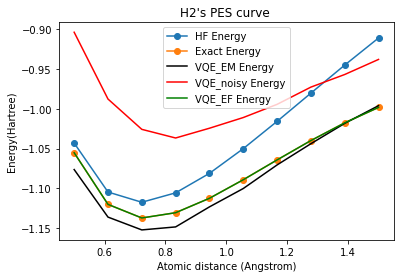

{'vqe_em_energy': [(-1.0762831857150699+0j),
  (-1.1360555522126763+0j),
  (-1.1521809374632284+0j),
  (-1.148407401253701+0j),
  (-1.1232189639432097+0j),
  (-1.1001373470515894+0j),
  (-1.0704877902825864+0j),
  (-1.0437968657989387+0j),
  (-1.0182370110961088+0j),
  (-0.995951403710889+0j)],
 'noisy_vqe_energy': [(-0.9036582741034624+0j),
  (-0.9876319090390633+0j),
  (-1.0257399341208908+0j),
  (-1.0366163639436439+0j),
  (-1.0243378245286068+0j),
  (-1.0109033321319187+0j),
  (-0.9943032931832322+0j),
  (-0.9726373914599966+0j),
  (-0.9567870486839936+0j),
  (-0.9378332997965497+0j)],
 'ef_vqe_energy': [(-1.0551597763898066+0j),
  (-1.1200708509215929+0j),
  (-1.1371661238340725+0j),
  (-1.1305491347926786+0j),
  (-1.11241899625264+0j),
  (-1.089115664101056+0j),
  (-1.064183405796149+0j),
  (-1.0398442143465787+0j),
  (-1.0175479703674288+0j),
  (-0.9981493415601213+0j)],
 'exact_energy': [array([-1.05515979+1.16056056e-16j]),
  array([-1.12007088+9.63837258e-18j]),
  array([-1.1

<Figure size 432x288 with 0 Axes>

In [5]:
distance_list = np.linspace(0.5,1.5,10)
molecule_name = 'H2'
n,m  = 2,1
optimizer = COBYLA(maxiter=50, tol=0.0001)
ansatz = 'num_particle_preserving' # 'simple'
plot_PES(molecule_name, distance_list, n, m, q, em_instance,ef_instance, ansatz, optimizer,save_fig=True)
